In [21]:
!pip install ultralytics
!pip install -q supervision

In [ ]:
!wget https://github.com/moured/YOLOv11-Document-Layout-Analysis/releases/download/doclaynet_weights/yolov11x_best.pt
!wget https://github.com/moured/YOLOv11-Document-Layout-Analysis/raw/main/images/sample_input.png

In [1]:
from ultralytics import YOLO
import supervision as sv 
import cv2

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.19 is currently installed 


In [ ]:
model_path = "yolov11x_best.pt"
image_path = "sample_input.png"

In [3]:
# Load a model
model = YOLO(model_path)

In [4]:
# Perform object detection on an image
results = model(image_path, conf=0.2, iou=0.8)[0]
image = cv2.imread(image_path)


image 1/1 /home/omoured/Downloads/yolov11weights/images/sample_input.png: 384x640 2 Section-headers, 24 Texts, 49.4ms
Speed: 1.5ms preprocess, 49.4ms inference, 104.6ms postprocess per image at shape (1, 3, 384, 640)


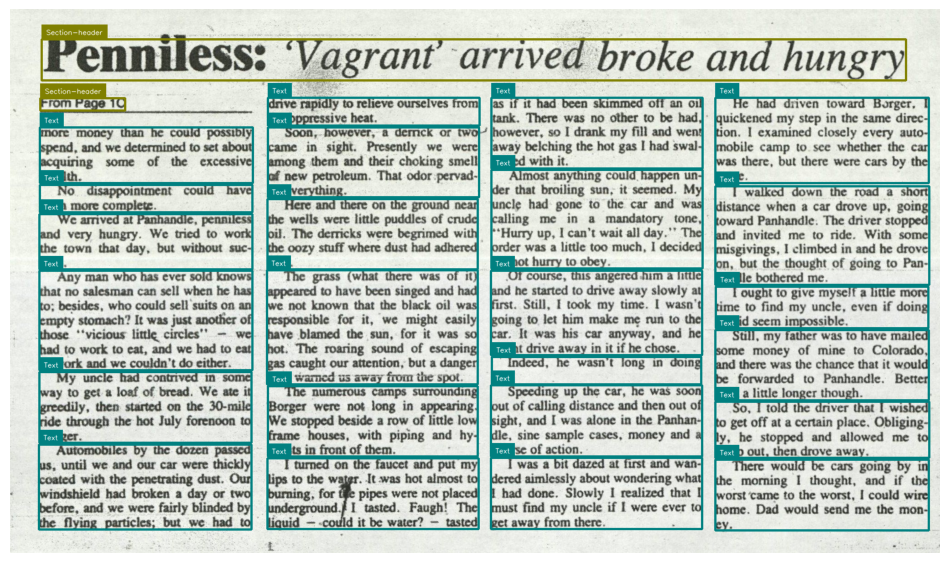

In [5]:
import supervision as sv

# Convert results to detections
detections = sv.Detections.from_ultralytics(results)

# Define a custom color palette for each class
class_colors = [
    sv.Color(255, 0, 0),    # Red for "Caption"
    sv.Color(0, 255, 0),    # Green for "Footnote"
    sv.Color(0, 0, 255),    # Blue for "Formula"
    sv.Color(255, 255, 0),  # Yellow for "List-item"
    sv.Color(255, 0, 255),  # Magenta for "Page-footer"
    sv.Color(0, 255, 255),  # Cyan for "Page-header"
    sv.Color(128, 0, 128),  # Purple for "Picture"
    sv.Color(128, 128, 0),  # Olive for "Section-header"
    sv.Color(128, 128, 128),# Gray for "Table"
    sv.Color(0, 128, 128),  # Teal for "Text"
    sv.Color(128, 0, 0)     # Maroon for "Title"
]

# Initialize the BoxAnnotator with the custom color palette and increased thickness
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette(class_colors),
    thickness=3  # Increased thickness for bounding boxes
)

# Annotate the image with bounding boxes
annotated_image = box_annotator.annotate(
    scene=image,
    detections=detections
)

# Initialize the LabelAnnotator with custom background and text colors
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette(class_colors),  # Background colors matching bounding boxes
    text_color=sv.Color(255, 255, 255)    # White text for better readability
)

# Annotate the image with labels
annotated_image = label_annotator.annotate(
    scene=annotated_image,
    detections=detections
)

# Display the annotated image
sv.plot_image(annotated_image)
